 


## The long history of human population *and*  models of population growth part 1

### Demography 88  Lab 1 
### Carl Mason cmason@berkeley.edu
### Aug  2018

## Learning Goals:
* geometric and exponential  growth models
* list objects and loop structures in Python

### put your student id number in the obvious place in the cell below... and then run it.

In [ ]:
# Run this cell to import the stuff we'll need
#  Don't give this any thought just run this cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

%matplotlib inline


from datascience import Table
from datascience.predicates import are
datasite="https://courses.demog.berkeley.edu/_masonDS88F18/data/"
quizsite="https://courses.demog.berkeley.edu/_masonDS88F18/cgi-bin/quiz.py"
from IPython.display import HTML, IFrame, display

def cquiz(qno) : 
    import IPython, requests 
    try:
        sid
    except NameError: 
        print("HEY! did you enter your sid way up at the top of this notebook?")
    Linkit='{0}?qno={1}&sid={2}'.format(quizsite,qno,sid)
    #print(Linkit)
    html = requests.get(Linkit)
    #display(IFrame(Linkit, 1000, 300))
    display(IFrame(Linkit, 1000, 400))

    
######################
# Here it is ... the obvious place to put your student id
sid=""
######################
if sid == "" :
    print("HEY! didn't I tell you to put your sid in the obvious place")
 

# A  question of no importance -- to demonstrate the infrastructure

execute the next cell; then click on the link that it generates.

In [25]:
cquiz('question0')

In [8]:
import random
n=6  # must be an even number round down
ids=random.sample(range(1,n+1),n)
n2=int(n/2)
n2
len(ids[:n2])
len(ids[n2:])
Table().with_columns('excellent partner 1',ids[:n2],'excellent partner 2',ids[n2:]).show()

excellent partner 1,excellent partner 2
1,2
4,5
6,3


## Tell us with whom you are partnering today


In [51]:
cquiz('growth1-partners')

# Part 1: Geometric growth


## Demography starts with the most fundamental of fundamental equations

### (eq 1) :     $P_t=P_{t-1}+B_{t-1}-D_{t-1}$

In words: population today ($P_t$) = Population yesterday ($P_{t-1}$) + Births yesterday ($B_{t-1}$) - Deaths yesterday ($D_{t-1}$).

### For geographic areas smaller than planets, we would of course add a few terms for immigration and emigrtion.

### $P_t=P_{t-1}+B_{t-1}-D_{t-1}+Immigration_{t-1} -Emigration_{t-1}$

But for today we're just dealing with world population so we'll stick with the simpler form in (eq 1).

As simple as eq 1 is, we can do quite a lot with it. 

$$\begin{align}
 P_t &= P_{t-1}+B_{t-1}-D_{t-1}\\
 \frac{P_t}{P_{t-1}} &= 1 + \frac{B_{t-1}}{P_{t-1}} -\frac{D_{t-1}}{P_{t-1}}\\
 P_{t} &= P_{t-1}\bigl(1+\frac{B_{t-1}}{P_{t-1}} -\frac{D_{t-1}}{P_{t-1}}\bigr)\\
\end{align}$$

Let's assume for the moment, that births and deaths affect a constant fraction of the population each year or in other words, the quantities $B_t/P_t$ and $D_t/P_t$ are constant  regardless of t.  This is not a terrible assumption for relatively short modern time periods.  Note that this does not mean that there are the same *number* of births or death each year -- as the population grows-- we are assuming that the number of deaths and births grow in the same proportion.

With constant birth and deat *rate* assumption we can rename the quantity $B/P-D/P$ as

$\frac{B}{P}-\frac{D}{P}=g$

and it follows that:

$P_t =  P_{t-1}(1+g)$

which is also knows as the "(Geometric) Growth Model"

### Let's experiment a bit with geometric growth and python

4856.24501771823


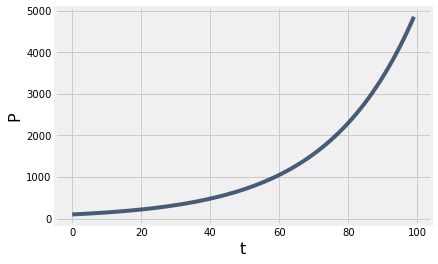

In [75]:
# Geometric growth
## In this cell we compute population at each t from 0 to T for a given
## initial population (P0)  and growth rate (g)
census=[]  ## a list to hold our results
P0=100     ## a starting value of the population
g=0.04   ## constant growth rate
T=100      #number of periods

time = np.arange(T)  # a sequence from 0 to T-1
for t in time :
    if t == 0:
        P=P0
    else:
        # if t>0 then census[t-1] hold's last period's P
        P=census[t-1]*(1+g)
    census.append(P)
    
print(census[T-1])     ## Python Question: why T-1 rather than T ?
tab0=Table().with_column('P',census,'t',np.arange(T))
tab0.plot('t')
## How many times will the population double in 100 years if g= .04?

In [15]:
cquiz('growth1-01')

In [55]:
cquiz('growth1-02')

## The long history of human population in three humps



<img src="http://courses.demog.berkeley.edu/mason88/images/3humps.png">

A couple of things to note about this picture:

* It's largely made up -- data on the first 199,000 or so years of human (homo sapien) population data are scarce so these graphs are drawn free hand. There is no Table().plot() call involved.
* Both axes are in log scale -- so the distance between 10 and 100 is the same as the distance between 1,000 and 10,000.  That compression applies to both time and population.
* The X axis is labeled in an odd way: "100,000" means 100,000 years ago. I could have labeled it -100,000 but I thought that would be even odder.



## Doubling time

If you think a moment about how the code in the "Geometric growth" cell (above) works, you might realize that what we did in order to compute the population at time t+1, was to multiply the population in year t by (1+g).
THEN to get the population at time t+2, we multiply the population in t+1 by that same (1+g).  If we were only interested in population in t=0 and t=2 then could have avoided learning about loops in Python and instead said to ourselves:

$$P_{2} =(P_0*(1+g))*(1+g)= P_0*(1+g)^2$$

... or even slicker (and more generally) for any number of years, $T$ at constant growth at rate g per year:

$$P_{T} = P_0*(1+g)^T$$

Using the elegent expression above, if we set $P_{T}=2P_{0}$ and solve for T... what will we learn? 

HINT: The title of this cell might be relevant.

$$ \frac{2P_{0}}{P_{0}} = 2 = (1+g)^T$$

and thus

$$ \frac{log(2)}{log(1+g)} = T^*$$

Let's use this expression for the doubling time, $T^*$ to examine how doubling time changes with changes in $g$.



In [21]:
cquiz("growth1-021")

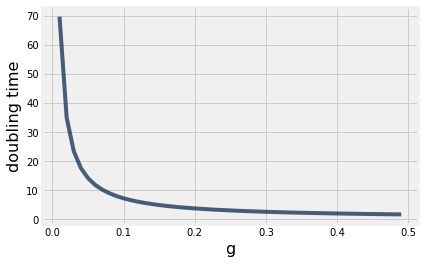

In [22]:
# Doubling time geometric growth
gs = np.arange(.01,.5,.01)  # a sequence beginning with .01 with step size .01
dtime=[]
for g in gs :
    dtime.append(np.log(2)/np.log(1+g))

Tab01=Table().with_columns('g',gs,'doubling time',dtime)
Tab01.plot('g')
#Tab01.show()    

In [61]:
cquiz("growth1-022")

In [59]:
cquiz("growth1-03")

# What happens between integer values of t?

## Suppose we wanted to know the population on say August 31st ?

In other words, suppose T is measured in years and we now want to know the population at some point during a year. How do we do that with the geometric growth model?  

###  Discuss with your partner how this might be done.  

For purposes of this problem, let's assume that months are of equal lengths and Aug 31 is $\frac{8}{12}$ of the a year.   

Let's not get bogged down right away with the juggling of mathematical symbols.  Begin instead by recalling what we are doing--we are exploring a model of population growth. If we know the population at two points in time, t=0 and t=1, and we posit that it has grown "geometrically" we'd like to know what the population is when t is *between* 0 and 1.  What is  going on with the population during the year?





In [26]:
## Linear Interpolation and Compound Growth
## Use this cell to compute P at each month in two ways and compare
## 
##  remove the tripple quotes to un-comment the code below  then
##  fix the python code to compute Population, P at each of 12 sub-periods 
##  The idea is that for a given P0 and g; we have P1= P0(1+g). But with this plain old
##  geometric growth model, the population between 0 and 1 at say 8/12  is not defined.
## 
##  we'll try two different reasonable ways to fill in the blank
##
##  1)  Linear interpolation in which we draw a straight line between P0 and P1 where P1 is simply P0(1+g) 
##  2)  Compound growth where we compute a new population for month 1 by applying the
##      geometric model to P0 then we apply the geometric model again to that new 
##      population to find the population in the second month and so on
##
##      Another way of looking at compound growth is to re-scale time.  Where t used
##      to be measured in years, we now measure it in months. Obviously a population 
##      which grows at rate g per YEAR grows at a fraction of g per month.
##
##      Perhaps there is as third or fourth way method of estimating the population at in between 0 and 1
##      go ahead and code it if you want to after fixing the code below

P0=100   # the initial population
g =.04 #   the annual growth rate 
# P_end is the population at the END of the long interval, t=1; P0 is the population at t=0
# we need 
P_end=P0*(1+g) 
# the number of sub periods 
periods=12
# slope of a  line between (0,P0) and (1,P1)
gslope=(P_end-P0)/periods
# growth rate per period under compound growth

"""
# gcompound = growth rate per MONTH it should be a fraction of g ... right ?
gcompound =  ?/? 

# List objects to hold the population at each month under linear interpolation
# and compound growth plans
P_linear=[]
P_compound=[]

time = np.arange(periods+1)
for t in time :
    if t == 0 :
        P_linear.append(P0)
        P_compound.append(P0)
    else :
        # we already set P at time 0; with 1, t-1 in the first iteration = 0 
        P_linear.append(P_linear[t-1] + gslope)
        P_compound.append( P_compound[t-1]*(? + ?))

Tab0=Table().with_columns('t',time,
                         'linear',P_linear,
                         'compound',P_compound)
Tab0.show()
Tab0.plot('t')
"""
print("""your instructor believes that if P0=100 and g=.04 and periods=12 
compound growth should produce a value of {} in subperiod 12""".format(104.07415429197907))


## ratio of population at time 1 compounding vs not compounding
#P_compound[-1]/P_linear[-1]



your instructor believes that if P0=100 and g=.04 and periods=12 
compound growth should produce a value of 104.07415429197907 in subperiod 12


In [58]:
cquiz('growth1-05')

In [63]:
cquiz("growth1-04")

# What happens to the compound growth model when the time periods become really really small?

I hope that our class disucssion has lead us to perfer the compound growth version over linear interpolation for organisms  that reproduce without regard to the time of year.

But this raises the question:  What is the right period of compounding?

Or more generally ... what happens when the periods of compounding become smaller and more numerous.  In the above case we divided the year into 12 equal months.  We could also have divided it into 365 days or 3,024,000 seconds or some even bigger number of smaller time periods.

## We saw that dividing into 12 periods produced a slightly larger "population" at t=1 year than did the geometric growth model without compounding.  What will happen to the predicted population at t=1year if we  subdvide the period between t=0 and t=1 into ever smaller sub-periods ?

The possible answers are: 
* the population at t=1 will continue to increase as we shrink and crowd in ever more sub-periods
* the population at t=1 will eventually become inured to the shrinking sub intervals and stabilize
* the effect of shorter periods will eventually overwhelm the effect of more periods and the population at t=1 will eventually begin to shrink with more sub-periods.

### Let's write some code to find out.


In [30]:
# Reducing Period Duration
MaxPeriods=20
g=.05
P_one=[]
Nperiods=np.arange(1,MaxPeriods,1)

''' # delete tripple quotes to un-comment  then fill in the blank

for period in Nperiods:
    ## compute population at t=1 ; when t is divided into Nperiods 
    ## sub-periods of equal length
    
    Pc=P0 *(1+(?/?))**(period)
    
    P_one.append(Pc)


Tab1=Table().with_columns('Nperiods',Nperiods,'Population at t=1',P_one)
Tab1.plot('Nperiods')
# last element of P_one
#P_one[-1]
'''

" # delete tripple quotes to un-comment  then fill in the blank\n\nfor period in Nperiods:\n    ## compute population at t=1 ; when t is divided into Nperiods \n    ## sub-periods of equal length\n    \n    Pc=P0 *(1+(?/?))**(period)\n    \n    P_one.append(Pc)\n\n\nTab1=Table().with_columns('Nperiods',Nperiods,'Population at t=1',P_one)\nTab1.plot('Nperiods')\n# last element of P_one\n#P_one[-1]\n"

##  Let's describe and interpret the plot we just created.

* What is on the Y-axis
* What is on the X-axis
* What does the shape of the graph tell us?


## What happens to the shape of the graph if we change the value of g ?
## What happens to the shape of the graph if we change the value of MaxPeriods?

In [69]:
cquiz("growth1-041")

## Did we just (re)learn something ?

Experiment with the code that you wrote in the cell called "Reducing Period Duration" in order to draw a conclusion about the perhaps vaguely familiar equation below?

$$ \lim_{n \to \infty} \bigl(1+\frac{1}{n}\bigr)^n = e $$

HINT: consider setting g=1 and increasing Nperiods and inspecting the last element of P_one

## How might we use this new knowledge to improve on the geometric growth model for human-type populations

While the geometric growth model is not wrong, we identified one shortcoming when it is applied to human-like populations by which I mean populations where individuals reproduce without regard to when censuses are taken -- unlike certain  plants.

* The geometric model is undefined except at regular constant intervals.


Since it is generally the case that we only observe (human) populations at regular decenial intervals, the geometric growth model can and often is applied to human populations. It works pretty well for most purposes.

Yet ... science marches on in interesting ways.  By developing a growth model that is not subject to this minor shortcoming,  other advances become possible as well.

## Exponential growth

The slightly better population growth model that we have all been waiting for is the exponential growth model.  In common speech,  any fast growing trend is referred to as "exponetial"  but for those of us care about words,  this is an abomination.  Exponential growth is a quite specificly defined process that follows Eq 2. Like the geometric growth model, it does not necessarily imply "rapid" population growth.

### (Eq 2)    $$P(t)=P_0e^{rt}$$

Because  $t$ is no longer limited to integer values, we can write $P(t)$ in place of $P_t$ indicating that Population is a *function* of time.   $r$ is the constant growth rate. $r$ is different enough from $g$ to warrent the use of a new letter. The crucial difference between $g$ and $r$ is that while $g$ refers to the rate of growth between two time points, $r$ is the **instantaneous** growth rate -- it is the growth rate that applies to all infinitessimally small units of time during the entire interval (over which growth is exponential at rate $r$).  



In [84]:
## Comparing Geometric and Exponential

## In this cell we'll compute geometric and exponential growth trajectories
## with the same parameters in order to compare the two. You'll need to fill 
## in one blank in order to make it work

# parameters to experiment with
T=30      #100000
g=.015      #.0003
r=.015      #.0003 
#
time=np.arange(0,T,step=.1)
P_exp=[]
P_geo=[]

## uncomment by removing the tripple quote
"""
for t in time:
   
    P_exp.append(P0*np.exp(r*?))

    # because P_geo is not well defined everywhere...
    if t == int(t):
        P_geo.append(P0*(1+g)**t)
    else:
        P_geo.append(np.nan)  #np.nan is a missing data code

## And now to plot the results
Tab2=Table().with_column('t',time,'geo',P_geo,'exp',P_exp)
Tab2.scatter('t')
"""
print("Your instructor believes that at T=29, P_geo ={geo} and P_exp={exp}".format(geo=.53998, exp=1.54496))
#Tab2.where('t',29)

Your instructor believes that at T=29, P_geo =0.53998 and P_exp=1.54496


In [ ]:
cquiz("growth1-042")

33 minus 11 =22


t,diff
0,0
0.1,nan
0.2,nan
0.3,nan
0.4,nan
0.5,nan
0.6,nan
0.7,nan
0.8,nan
0.9,nan


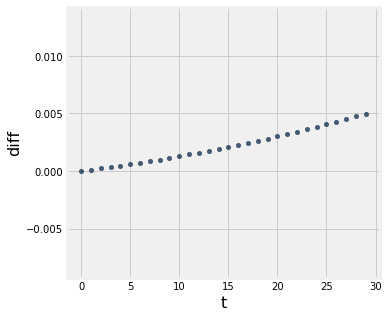

In [86]:
##  The differnce between two lists - some python tricks

## In this cell we learn some new python tricks that we can use in place of a for loop
## This is not essential, but it's handy.

## Suppose we would like to know the difference between the exponential and geometric
## trajectories that we calculated in the cell called Comparing Geometric and Exponential
##
##  We could write a for loop -- we're experts at that.  But python has some other tricks
##  that can speed up computation or might be more esthetically pleasing. The trick
##  we'll explore presently involves two steps:
##  1) creating a function (a very useful thing )
##  2) map'ing or applying that function over one or more lists (an obscure but useful thing)


# first create a function -- a function in python is a
# chunk of code that can be re-run with different inputs. We have already
# used lots of functions:  np.arange() np.log() for example.  What's new here
# is that we can write funcions ourselves.  

def subt(x,y):
    """
    The simplest function possible given x and y this returns y-g
    """
    return(x-y)

# functions are useful in lots of ways but typically they are called and have
# their return value assigned to a new object like this:
#
res = subt(33,11) 
print("33 minus 11 ={result}".format(result=res))
#    
## we could use any two numbers
# res the variable res now holds the output of subt(33,11) that is to say 22
# print("33 -11 ={}".format(res))
# But in the present case we're going to use the subt function differently..
# map is an obscure but useful python function which returns the result 
# of a function (subt) called with an element from each
# list P_exp and P_geo
differ=map(subt,P_exp,P_geo)

## map() returns an object that can be converted into a list

differ=list(differ)
# Here is how we might do the same with a loop
# differ=[]
# for i in np.arange(len(P_exp)) :
#     differ.append(p_exp[i] - P_geo[i])

Tab03=Table().with_column('t',time,'diff',differ)
Tab03.scatter('t')

"""
# code for question growth1-06
Tab03.show(11)
for d in differ :
    if not np.isnan(d) :
        print(d)
"""
Tab03.show(11)

## Is there an $\hat{r}$ and $\hat{g}$ that makes the exponential growth path the same as the geometric?



In other words,  is the exponential model really the same thing as geometric model but with a slightly different growth rate (and defined at all points)?

Use the code in the cell "Comparing Geometric and Exponential" to answer the above question.  A good approach would be to find values of $g$ and $r$ for which the population
at the beginning and the end (or any two points) are the same.  If the points in the middle do not match... then we can be sure that the functions are not same.

Suggetion:  There are two ways to approch this problem:

* You could plug in some possible values of $\hat{r}$ in the code and adjust upward and downward until P_exp[T] = P_geo[T]  that is until the final populations match under both growth models.  The precision involved here would require running a lot of trials -- perhaps automating the search in the way that you will learn about next week...

Or 

* You could solve for $\hat{r}$ in terms of g; then plug $\hat{r}$ into the code and see what happens. If you start by assuming that P_exp[T] = P_geo[T]  that is that the two models produce the same populations at the endpoints 0 and T, it follows that:

$$P_0e^{\hat{rt}} = P_0(1+g)^t$$

dividing both sides by $P_0$

$$e^{\hat{rt}} = (1+g)^t$$

taking the log of both sides ..

$$\hat{rt} = log(1+g)t$$

And finally  divide both sides by t

$$\hat{r} = log(1+g)$$

Now you can use the above expression along with the code in the cell "Comparing Geometric and Exponential" and "The differnce between two lists - some python tricks"  to answer question 'growth1-06'

In [89]:
cquiz('growth1-06')


## Does a little randomness mess up the exponential growth model?

We've been assuming for a while now that the difference between birth rates ($B/P$) and death rates ($D/T$) is constant across time.  That was convenient mathematically, but perhaps not really all that realistic. Not much is really constant after all.

So what if we relax our constant rate assumption just a bit and instead assume that (B/P-D/P) and thus $r$ has a constant **average** that is from period to period, $r$ may change, but the average value of $r$ over all periods is say $\bar{r}$

In the spirit of Data 8, let's simulate this. That will require a new numpy module called, random,  and perhaps a little soul searching on the question:  do you believe that computers can generate **random** numbers?

HINT: No they can't. But it's more of a spiritual problem than a practical one.


t,exp,rand
99,459.523,459.523


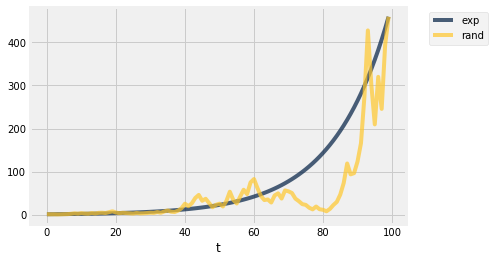

In [223]:
# Random deviates - exponential 
# 
# In this cell we generate a list of psudo-random numbers with mean r
# then we compute the population at each point in time letting the population grow according to
# those random rates. This is also called piecewise exponential to distinguish it from constant exponential
# 
T=100  # number of periods 
r=.05  # mean growth rate 
## google numpy random.sample to see what this does
epsilon=(np.random.sample(size=T) - .5)
# Why is this r_adjustment necessary ? 
# 
r_adj= r + np.mean(epsilon)
time=np.arange(T)
expP=[]
randP=[]
for t in time :
    if t == 0 :
        expP.append(np.exp(r_adj))
        randP.append(np.exp(r+epsilon[0]))
    else :
        expP.append(expP[t-1]*np.exp(r_adj))
        randP.append(randP[t-1]*np.exp(r + epsilon[t]))
        

Tab4=Table().with_column('t',time,"exp",expP,"rand",randP)
Tab4.plot('t')
Tab4.where('t',T-1)


In [32]:
cquiz('growth1-07')

##  That's about it for Lab 1 ...

Since next Monday, Sep 3, is a holiday, we won't have a lab next week.  Instead, we'll do some extra reading -- see the course calendar http://courses.demog.berkeley.edu/mason88/Calendar. When we meet again on Sep 10, we'll compare the exponential growth model with real data on past human populations, and we'll introduce a more sophisticated model.

Before you wonder off... a brief evaluation of this lab would be appreciated.  

Thanks.




In [7]:
cquiz('growth1-eval')